In [558]:
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import moment
from scipy.stats import rv_continuous
import scipy.stats as scs
import seaborn

In [559]:
N=25
lambd=1
X=np.array([round(random.expovariate(lambd),3) for i in range(N)])
print(X)

[0.014 4.47  0.273 2.242 0.835 1.094 2.443 1.556 0.099 0.1   0.499 0.367
 0.1   5.593 0.214 0.169 0.477 1.537 0.157 1.669 3.5   0.309 1.351 0.544
 0.398]


In [560]:
# a) Определить моду, медиану, размах, коэффициент асимитрии

In [561]:
X=np.sort(X)
print(X)

[0.014 0.099 0.1   0.1   0.157 0.169 0.214 0.273 0.309 0.367 0.398 0.477
 0.499 0.544 0.835 1.094 1.351 1.537 1.556 1.669 2.242 2.443 3.5   4.47
 5.593]


In [562]:
#мода
statistics.mode(X.round(1))

0.1

In [563]:
#медиана
if N%2==1:
    med=np.sort(X)[N//2+1]
else:
    med=(np.sort(X)[N//2+1] + np.sort(X)[N//2])/2
print(med)

0.544


In [564]:
#размах
print(X[N-1]-X[0])

5.579


In [565]:
#коэффициент асимметрии

In [566]:
moment_3=moment(X, moment=3)
s=np.std(X)
gamma=round(moment_3/s**3, 2)
print(gamma)

1.68


In [568]:
#б) построение эмпирической функции распределения и гистограмму, boxplot;

[0.   0.04 0.08 0.08 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96]


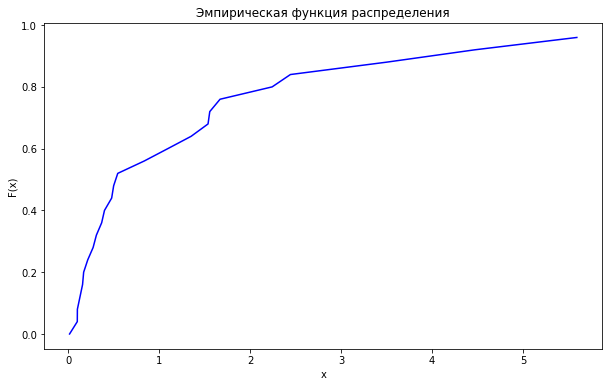

In [569]:
y = np.array([np.sum(X<X[i]) for i in range(0,N)])/len(X)
print(y)
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(X, y, color = 'blue')
ax.set_title('Эмпирическая функция распределения')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
plt.show()

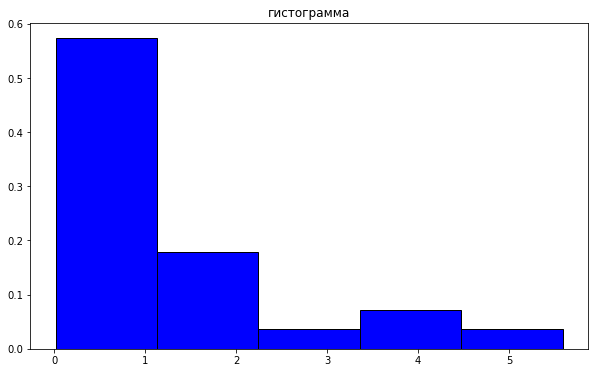

In [594]:
k=1 + math.log2(N)
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(X, bins = int(k), density=True, histtype='bar', edgecolor='black', color = 'blue') 
plt.title("гистограмма")
plt.show()

In [571]:
#boxplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


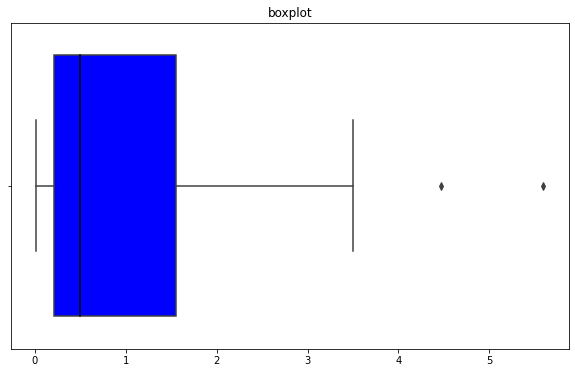

In [595]:
fig, ax = plt.subplots(figsize = (10,6))
bp = sns.boxplot(X, boxprops={"facecolor":"blue"},medianprops={"color": "black"},)
plt.title("boxplot")
plt.show()

In [573]:
#c) ядерная оценка плотности распределения

In [574]:
X_mean = X.mean()
s = np.sqrt(1/(N-1)*np.sum((X-X_mean)**2))
h = 2.344*s/(N**0.2)

In [575]:
#ядро Епанечникова (-1,1)
def q(y):
    return 0.75*(1-y**2)

In [576]:
def p_kernel(z):
        return 1/(N*h)*np.sum(q(z-X)/h)

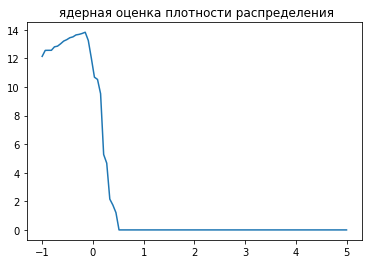

In [596]:
P = np.array([0.]*100)
for i in range(N):
    x = np.linspace(-1., 5., 100)
    q = np.array([])
    for x in X:
        if X[i]-h<=x and x<=X[i]+h:
            q = np.append(q, 3/4 * (1 - ((x - X[i])/h) ** 2))
        else:
            q = np.append(q, 0)
    for i in range(len(q)):
        P[i] = (P[i]+q[i])
x = np.linspace(-1., 5., 100)
plt.plot(x, P)
plt.title(" ядерная оценка плотности распределения")
plt.show()

In [578]:
#d) определить плотность распределения среднего арифметического элементов выборки
# сравнить с бутстраповской оценкой плотности


In [ ]:
#расчёт в тетради

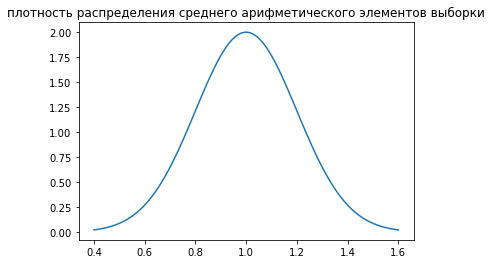

In [584]:
m=1
D=0.04
s=math.sqrt(D)
x=np.linspace(m-3*s, m+ 3*s, 100)
plt.plot(x, sps.norm.pdf(x, m, s))
plt.title("плотность распределения среднего арифметического элементов выборки")
plt.show()

In [581]:
#бутстраповская оценка плотности

In [582]:
mean_1=[]
for i in range(1000):
    mean_sample= np.random.choice(X, size=N, replace=True)
    mean_1.append(mean_sample.mean())

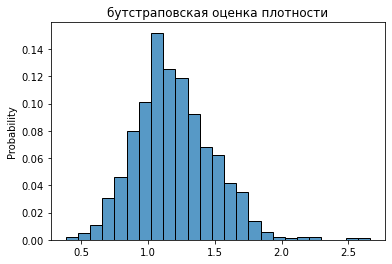

In [583]:
plt.title("бутстраповская оценка плотности")
seaborn.histplot(mean_1, bins = N, stat="probability",common_norm=True)
plt.show()

In [485]:
#e) найти бутстраповскую оценку плотности распределения коэффициента асимметрии

In [486]:
gamma=[]
for i in range(1000):
    gamma_sample = np.random.choice(X, size=N, replace=True)
    gamma.append(scs.skew(gamma_sample))

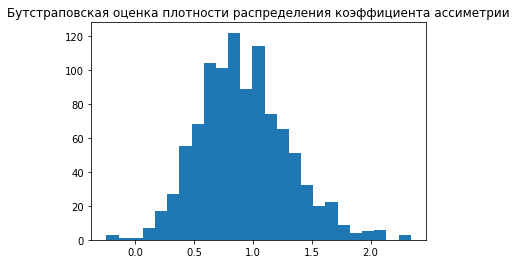

In [487]:
plt.title('Бутстраповская оценка плотности распределения коэффициента ассиметрии')
plt.hist(gamma, N)
plt.show()